In [23]:
import os
if not os.path.exists('data'):
    os.makedirs('data')

!curl -L -o data/final_database.csv "https://www.dropbox.com/scl/fi/j0yasupjf1nln4jhh40hd/final_database.csv?rlkey=gxa8cqm23y9owq1lcuuzgvub4&st=0o9qf8tk&dl=0"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     30      0 --:--:-- --:--:-- --:--:--     0-:--:--    30
100  107M  100  107M    0     0  11.2M      0  0:00:09  0:00:09 --:--:-- 12.8M


## Library imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Data path

In [4]:
DATA_PATH = 'data/final_database.csv'

We first read the dataset

In [5]:
data = pd.read_csv(DATA_PATH)
data.head()

/var/folders/dh/598mynx558b49xpd__0_7csw0000gn/T/ipykernel_71836/230350411.py:1: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_PATH)


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

Some columns have mixed dtypes, we will first see if we really need them and if so we will handle the mixed types afterwards.

We print the different columns

In [6]:
for i, column in enumerate(data.columns):
    print(i, column)

0 Country
1 Uri
2 Popularity
3 Title
4 Artist
5 Album/Single
6 Genre
7 Artist_followers
8 Explicit
9 Album
10 Release_date
11 Track_number
12 Tracks_in_album
13 danceability
14 energy
15 key
16 loudness
17 mode
18 speechiness
19 acoustics
20 instrumentalness
21 liveliness
22 valence
23 tempo
24 duration_ms
25 time_signature
26 Genre_new
27 Days_since_release
28 Released_after_2017
29 Explicit_false
30 Explicit_true
31 album
32 compilation
33 single
34 bolero
35 boy band
36 country
37 dance/electronic
38 else
39 funk
40 hip hop
41 house
42 indie
43 jazz
44 k-pop
45 latin
46 metal
47 opm
48 pop
49 r&b/soul
50 rap
51 reggae
52 reggaeton
53 rock
54 trap
55 syuzhet_norm
56 bing_norm
57 afinn_norm
58 nrc_norm
59 syuzhet
60 bing
61 afinn
62 nrc
63 anger
64 anticipation
65 disgust
66 fear
67 joy
68 sadness
69 surprise
70 trust
71 negative
72 positive
73 n_words
74 anger_norm
75 anticipation_norm
76 disgust_norm
77 fear_norm
78 joy_norm
79 sadness_norm
80 surprise_norm
81 trust_norm
82 negative

We will drop columns that are one-hot-encoded countries, genres, topics, and other columns that are not useful for our analysis

In [7]:
countries = list(data.columns[112:147]) 

genres = list(data.columns[34:55])

lda_topics = list(data.columns[101:109])

columns_to_drop = countries +  genres + lda_topics + ["Uri", "Track_number", "Tracks_in_album", "Explicit_false", "Explicit_true", "album", "single",
                                                 "bolero", "Released_after_2017"]

We process the release date to get the year and month

In [8]:
data_filtered = data.drop(columns = columns_to_drop)
data_filtered["Release_date"] = pd.to_datetime(data_filtered["Release_date"].apply(lambda x: np.nan if x == "n-a" else x), format = "mixed")

Data description

In [9]:
data_filtered.describe()

,Popularity,Release_date,Days_since_release,compilation,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Popu_max,Top10_dummy,Top50_dummy
count,170633.000000,170628,167411.000000,170633.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71449.000000,71449.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,2016-10-08 15:17:31.466347776,1337.530228,0.015026,0.057969,-0.189603,-0.055423,0.023168,-0.018181,-1.083197,-2.512649,0.008432,2.787020,3.120432,1.929814,2.957129,3.191662,2.757911,1.876687,3.215443,5.433139,5.441572,313.905421,0.008396,0.010360,0.005804,0.009313,0.010905,0.008997,0.006219,0.010330,0.017027,0.017758,0.114947,0.150568,0.079596,0.127251,0.163345,0.129950,0.087283,0.147060,0.483059,0.516941,3.595803,7.447833,-0.220842,0.582584,0.055673,0.361743,0.226668,0.047693,0.146812,89.926738,0.087035,0.294843
min,0.800000,1899-12-31 00:00:00,9.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-22.500000,-31.000000,-70.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,77.600000,2017-06-02 00:00:00,428.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.650000,-3.000000,-7.000000,-2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,206.000000,0.003333,0.005155,0.000000,0.003876,0.005357,0.003906,0.002710,0.005051,0.008949,0.010230,0.062500,0.096774,0.000000,0.076923,0.093750,0.071429,0.044444,0.095238,0.350000,0.378378,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,515.150000,2018-07-20 00:00:00,834.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.200000,-1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,4.000000,285.000000,0.007220,0.009174,0.004854,0.007812,0.009501,0.007772,0.005505,0.009009,0.015152,0.015748,0.115385,0.142857,0.076923,0.125000,0.148936,0.125000,0.083333,0.142857,0.500000,0.500000,1.000000,5.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,3867.850000,2019-09-06 00:00:00,1240.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.900000,1.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,7.000000,7.000000,386.000000,0.012346,0.013986,0.008621,0.013308,0.014458,0.012500,0.008734,0.014019,0.022814,0.023188,0.166667,0.200000,0.117647,0.172414,0.214286,0.176471,0.121212,0.200000,0.621622,0.650000,5.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,138.000000,0.000000,1.000000
max,23376

There are still some columns with mixed dtypes. Let's fix them manually. We ignore missing values for now as we handle them afterwards.

In [10]:
print("Number of attributes:", len(data_filtered.columns))
print("Number of unique songs:", data["Title"].nunique())
print("Number of unique artists:", data["Artist"].nunique())

Number of attributes: 79
Number of unique songs: 47045
Number of unique artists: 25524


In [11]:
# Check for missing values
missing_values_percentage = data_filtered.isnull().sum() / len(data_filtered)
print("Maximum percentage of missing values: ", max(missing_values_percentage))
missing_values = data_filtered.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index
print("Number of columns with missing values: ", len(columns_with_missing_values))


Maximum percentage of missing values:  0.5816049650419322
Number of columns with missing values:  49


In [12]:
# Check if most important columns have missing values
important_columns = ["Country", "Popularity", "Title", "Artist", "Album/Single", "Genre", "Artist_followers", "Album"]
print("Missing values in important columns: ", True in [col in columns_with_missing_values for col in important_columns])

Missing values in important columns:  True


### Null Analysis

In [ ]:
# Display the ratio of null values per column
null_ratios = data_filtered.isnull().sum() / len(data_filtered)
null_ratios_sorted = null_ratios.sort_values(ascending=False)
null_ratios_df = pd.DataFrame(null_ratios_sorted, columns=['Null Ratio'])
null_ratios_df.reset_index(inplace=True, names=['Feature'])
null_ratios_df.index += 1
pd.set_option('display.max_rows', None)
null_ratios_df


,Feature,Null Ratio
1,anticipation_norm2,0.581605
2,anger_norm2,0.581605
3,disgust_norm2,0.581605
4,fear_norm2,0.581605
5,joy_norm2,0.581605
6,sadness_norm2,0.581605
7,surprise_norm2,0.581605
8,trust_norm2,0.581605
9,negative_norm2,0.581271
10,positive_norm2,0.581271


In [ ]:
# check that the nulls are in the same rows for first 46 features
features_with_nulls = list(null_ratios_df.iloc[:46].Feature)

rows_with_nulls = data_filtered[features_with_nulls].isnull().any(axis=1).sum()
ratio_with_nulls = rows_with_nulls / len(data_filtered)
print(f"Ratio of rows with at least one null in selected features: {ratio_with_nulls:.3f}")

Ratio of rows with at least one null in selected features: 0.583


We can see two clusters of columns - ones that have nearly no nulls (starting from `Artist_followers` and down the list) and columns with 57\% of nulls. We have decided to make two datasets from this data and choose from them for each visualization. The first dataset will include columns without nulls and all data. The second will include 42% of data without nulls and all columns

### Splitting dataset based on null values

In [45]:
# Remove Artist_followers and Release_date from the list of columns to drop

# Keep Artist_followers and Release_date but not Days_since_release because we already have the release date
columns_with_null_to_kepp = ["Artist_followers", "Release_date"]
features_with_nulls = [col for col in features_with_nulls if col not in columns_with_null_to_kepp]

# Create two datasets
data_filtered_no_nulls = data_filtered.drop(columns=features_with_nulls)
data_filtered_no_nulls = data_filtered_no_nulls.dropna()
data_filtered_nulls = data_filtered.dropna().copy()

We have seen before that there are mixed type columns, let's check if this problem persists:

In [46]:
# Find columns with mixed dtypes for no nulls dataset
mixed_dtypes_no_nulls = []
for col in data_filtered_no_nulls.columns:
    if data_filtered_no_nulls[col].dtype == "object":
        mixed_dtypes_no_nulls.append(col)

print(mixed_dtypes_no_nulls)

['Country', 'Title', 'Artist', 'Album/Single', 'Genre', 'Artist_followers', 'Explicit', 'Album', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Genre_new', 'Cluster']


In [47]:
# Fix mixed dtypes for no nulls dataset
data_filtered_no_nulls["Country"] = data_filtered_no_nulls["Country"].astype(str)
data_filtered_no_nulls["Artist"] = data_filtered_no_nulls["Artist"].astype(str)
data_filtered_no_nulls["Title"] = data_filtered_no_nulls["Title"].astype(str)
data_filtered_no_nulls["Album/Single"] = data_filtered_no_nulls["Album/Single"].astype(str)
data_filtered_no_nulls["Genre"] = data_filtered_no_nulls["Genre"].astype(str)
data_filtered_no_nulls["Artist_followers"] = data_filtered_no_nulls["Artist_followers"].astype(float)
data_filtered_no_nulls["Explicit"] = data_filtered_no_nulls["Explicit"].astype(bool)
data_filtered_no_nulls["Album"] = data_filtered_no_nulls["Album"].astype(str)
data_filtered_no_nulls["danceability"] = pd.to_numeric(data_filtered_no_nulls["danceability"], errors='coerce').astype('float')
data_filtered_no_nulls["energy"] = pd.to_numeric(data_filtered_no_nulls["energy"], errors='coerce').astype('float')
data_filtered_no_nulls["key"] = pd.to_numeric(data_filtered_no_nulls["key"], errors='coerce').astype('float')
data_filtered_no_nulls["loudness"] = pd.to_numeric(data_filtered_no_nulls["loudness"], errors='coerce').astype('float')
data_filtered_no_nulls["mode"] = pd.to_numeric(data_filtered_no_nulls["mode"], errors='coerce').astype('float')
data_filtered_no_nulls["speechiness"] = pd.to_numeric(data_filtered_no_nulls["speechiness"], errors='coerce').astype('float')
data_filtered_no_nulls["acoustics"] = pd.to_numeric(data_filtered_no_nulls["acoustics"], errors='coerce').astype('float')
data_filtered_no_nulls["instrumentalness"] = pd.to_numeric(data_filtered_no_nulls["instrumentalness"], errors='coerce').astype('float')
data_filtered_no_nulls["liveliness"] = pd.to_numeric(data_filtered_no_nulls["liveliness"], errors='coerce').astype('float')
data_filtered_no_nulls["valence"] = pd.to_numeric(data_filtered_no_nulls["valence"], errors='coerce').astype('float')
data_filtered_no_nulls["tempo"] = pd.to_numeric(data_filtered_no_nulls["tempo"], errors='coerce').astype('float')
data_filtered_no_nulls["duration_ms"] = pd.to_numeric(data_filtered_no_nulls["duration_ms"], errors='coerce').astype(float)
data_filtered_no_nulls["time_signature"] = pd.to_numeric(data_filtered_no_nulls["time_signature"], errors='coerce').astype(float)
data_filtered_no_nulls["Genre_new"] = data_filtered_no_nulls["Genre_new"].astype(str)
data_filtered_no_nulls["Cluster"] = data_filtered_no_nulls["Cluster"].astype(str)

In [48]:
# Remove again nan values created by the conversion
data_filtered_no_nulls = data_filtered_no_nulls.dropna()

In [49]:
# Find columns with mixed dtypes for nulls dataset
mixed_dtypes_nulls = []
for col in data_filtered_nulls.columns:
    if data_filtered_nulls[col].dtype == "object":
        mixed_dtypes_nulls.append(col)

print(mixed_dtypes_nulls)

['Country', 'Title', 'Artist', 'Album/Single', 'Genre', 'Artist_followers', 'Explicit', 'Album', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Genre_new', 'LDA_Topic', 'Cluster']


In [50]:
# Fix mixed dtypes for nulls dataset
data_filtered_nulls["Country"] = data_filtered_nulls["Country"].astype(str)
data_filtered_nulls["Artist"] = data_filtered_nulls["Artist"].astype(str)
data_filtered_nulls["Title"] = data_filtered_nulls["Title"].astype(str)
data_filtered_nulls["Album/Single"] = data_filtered_nulls["Album/Single"].astype(str)
data_filtered_nulls["Genre"] = data_filtered_nulls["Genre"].astype(str)
data_filtered_nulls["Artist_followers"] = data_filtered_nulls["Artist_followers"].astype(float)
data_filtered_nulls["Explicit"] = data_filtered_nulls["Explicit"].astype(bool)
data_filtered_nulls["Album"] = data_filtered_nulls["Album"].astype(str)
data_filtered_nulls["danceability"] = pd.to_numeric(data_filtered_nulls["danceability"], errors='coerce').astype('float')
data_filtered_nulls["energy"] = pd.to_numeric(data_filtered_nulls["energy"], errors='coerce').astype('float')
data_filtered_nulls["key"] = pd.to_numeric(data_filtered_nulls["key"], errors='coerce').astype('float')
data_filtered_nulls["loudness"] = pd.to_numeric(data_filtered_nulls["loudness"], errors='coerce').astype('float')
data_filtered_nulls["mode"] = pd.to_numeric(data_filtered_nulls["mode"], errors='coerce').astype('float')
data_filtered_nulls["speechiness"] = pd.to_numeric(data_filtered_nulls["speechiness"], errors='coerce').astype('float')
data_filtered_nulls["acoustics"] = pd.to_numeric(data_filtered_nulls["acoustics"], errors='coerce').astype('float')
data_filtered_nulls["instrumentalness"] = pd.to_numeric(data_filtered_nulls["instrumentalness"], errors='coerce').astype('float')
data_filtered_nulls["liveliness"] = pd.to_numeric(data_filtered_nulls["liveliness"], errors='coerce').astype('float')
data_filtered_nulls["valence"] = pd.to_numeric(data_filtered_nulls["valence"], errors='coerce').astype('float')
data_filtered_nulls["tempo"] = pd.to_numeric(data_filtered_nulls["tempo"], errors='coerce').astype('float')
data_filtered_nulls["duration_ms"] = pd.to_numeric(data_filtered_nulls["duration_ms"], errors='coerce').astype(float)
data_filtered_nulls["time_signature"] = pd.to_numeric(data_filtered_nulls["time_signature"], errors='coerce').astype(float)
data_filtered_nulls["Genre_new"] = data_filtered_nulls["Genre_new"].astype(str)
data_filtered_nulls["LDA_Topic"] = data_filtered_nulls["LDA_Topic"].astype(str)
data_filtered_nulls["Cluster"] = data_filtered_nulls["Cluster"].astype(str)

In [51]:
# Remove again nan values created by the conversion
data_filtered_nulls = data_filtered_nulls.dropna()

In [52]:
# Save the datasets
data_filtered_no_nulls.to_csv("data/data_filtered_no_null_columns.csv", index=False)
data_filtered_nulls.to_csv("data/data_filtered_all_columns.csv", index=False)

### Exploratory Data Analysis
We will perform an exploratory data analysis on both created data sets

In [53]:
data_filtered_no_nulls = pd.read_csv("data/data_filtered_no_null_columns.csv")
data_filtered_no_nulls.head()

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,compilation,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,0,0,0,0,10,1.0,1.0,global
1,USA,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,0,0,0,0,191,0.0,0.0,english speaking and nordic
2,Argentina,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,0.767,0.709,1.0,-4.47,1.0,0.336,0.323,0.0,0.0676,0.72,171.993,258639.0,4.0,hip hop,740.0,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [54]:
data_filtered_nulls = pd.read_csv("data/data_filtered_all_columns.csv")
data_filtered_nulls.head()

,Country,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,compilation,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,418.0,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,0.572,0.53,6.0,-8.521,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop,1314.0,0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-7.0,-3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,274.0,0.0,0.00365,0.0,0.00365,0.00365,0.007299,0.0,0.00365,0.014599,0.00365,0.0,0.166667,0.0,0.166667,0.166667,0.333333,0.0,0.166667,0.8,0.2,0.0,0.0,-1.0,1.0,0.0,0.0,Desire,1,0,0,72,0.0,0.0,global
1,USA,581.2,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,0.572,0.53,6.0,-8.521,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop,1314.0,0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-7.0,-3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,274.0,0.0,0.00365,0.0,0.00365,0.00365,0.007299,0.0,0.00365,0.014599,0.00365,0.0,0.166667,0.0,0.166667,0.166667,0.333333,0.0,0.166667,0.8,0.2,0.0,0.0,-1.0,1.0,0.0,0.0,Desire,1,0,0,55,0.0,0.0,english speaking and nordic
2,UK,120.8,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,0.572,0.53,6.0,-8.521,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop,1314.0,0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-7.0,-3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,274.0,0.0,0.00365,0.0,0.00365,0.00365,0.007299,0.0,0.00365,0.014599,0.00365,0.0,0.166667,0.0,0.166667,0.166667,0.333333,0.0,0.166667,0.8,0.2,0.0,0.0,-1.0,1.0,0.0,0.0,Desire,1,0,0,109,0.0,0.0,english speaking and nordic
3,Austria,404.0,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,0.572,0.53,6.0,-8.521,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop,1314.0,0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-7.0,-3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,274.0,0.0,0.00365,0.0,0.00365,0.00365,0.007299,0.0,0.00365,0.014599,0.00365,0.0,0.166667,0.0,0.166667,0.166667,0.333333,0.0,0.166667,0.8,0.2,0.0,0.0,-1.0,1.0,0.0,0.0,Desire,1,0,0,62,0.0,0.0,english speaking and nordic
4,Australia,29.6,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,0.572,0.53,6.0,-8.521,0.0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613.0,4.0,pop,1314.0,0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-7.0,-3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,274.0,0.0,0.00365,0.0,0.00365,0.00365,0.007299,0.0,0.00365,0.014599,0.00365,0.0,0.166667,0.0,0.166667,0.166667,0.333333,0.0,0.166667,0.8,0.2,0.0,0.0,-1.0,1.0,0.0,0.0,Desire,1,0,0,172,0.0,0.0,english speaking and nordic


#### Basic Statistics

In [56]:
# No nulls dataset
print("Number of rows without null columns:", len(data_filtered_no_nulls))
print("Number of columns with (nearly) no nulls:", len(data_filtered_no_nulls.columns))
print("Number of unique countries in no nulls dataset:", data_filtered_no_nulls["Country"].nunique())
print("Number of unique artists in no nulls dataset:", data_filtered_no_nulls["Artist"].nunique())
print("Number of unique albums in no nulls dataset:", data_filtered_no_nulls["Album"].nunique())
print("Number of unique genres in no nulls dataset:", data_filtered_no_nulls["Genre"].nunique())
print("Average artist followers in no nulls dataset:", data_filtered_no_nulls["Artist_followers"].mean())
print("Average popularity in no nulls dataset:", data_filtered_no_nulls["Popularity"].mean())
print("Average duration in ms in no nulls dataset:", data_filtered_no_nulls["duration_ms"].mean())
print("Proportion of explicit songs in no nulls dataset:", data_filtered_no_nulls["Explicit"].mean())
print("Average days since release in no nulls dataset:", data_filtered_no_nulls["Days_since_release"].mean())

Number of rows without null columns: 167356
Number of columns with (nearly) no nulls: 33
Number of unique countries in no nulls dataset: 35
Number of unique artists in no nulls dataset: 25063
Number of unique albums in no nulls dataset: 33803
Number of unique genres in no nulls dataset: 1099
Average artist followers in no nulls dataset: 8544889.076567318
Average popularity in no nulls dataset: 5475.695414565359
Average duration in ms in no nulls dataset: 206392.47966610102
Proportion of explicit songs in no nulls dataset: 0.36821506250149383
Average days since release in no nulls dataset: 1337.543004134898


In [57]:
# Nulls dataset
print("Number of rows with null columns:", len(data_filtered_nulls))
print("Number of columns with nulls:", len(data_filtered_nulls.columns))
print("Number of unique countries in nulls dataset:", data_filtered_nulls["Country"].nunique())
print("Number of unique artists in nulls dataset:", data_filtered_nulls["Artist"].nunique())
print("Number of unique albums in nulls dataset:", data_filtered_nulls["Album"].nunique())
print("Number of unique genres in nulls dataset:", data_filtered_nulls["Genre"].nunique())
print("Average artist followers in nulls dataset:", data_filtered_nulls["Artist_followers"].mean())
print("Average popularity in nulls dataset:", data_filtered_nulls["Popularity"].mean())
print("Average duration in ms in nulls dataset:", data_filtered_nulls["duration_ms"].mean())
print("Proportion of explicit songs in nulls dataset:", data_filtered_nulls["Explicit"].mean())
print("Average days since release in nulls dataset:", data_filtered_nulls["Days_since_release"].mean())

Number of rows with null columns: 69875
Number of columns with nulls: 79
Number of unique countries in nulls dataset: 35
Number of unique artists in nulls dataset: 5332
Number of unique albums in nulls dataset: 5921
Number of unique genres in nulls dataset: 527
Average artist followers in nulls dataset: 12653714.141023256
Average popularity in nulls dataset: 5725.418301967802
Average duration in ms in nulls dataset: 207134.81464042934
Proportion of explicit songs in nulls dataset: 0.39450447227191415
Average days since release in nulls dataset: 1459.1597280858675


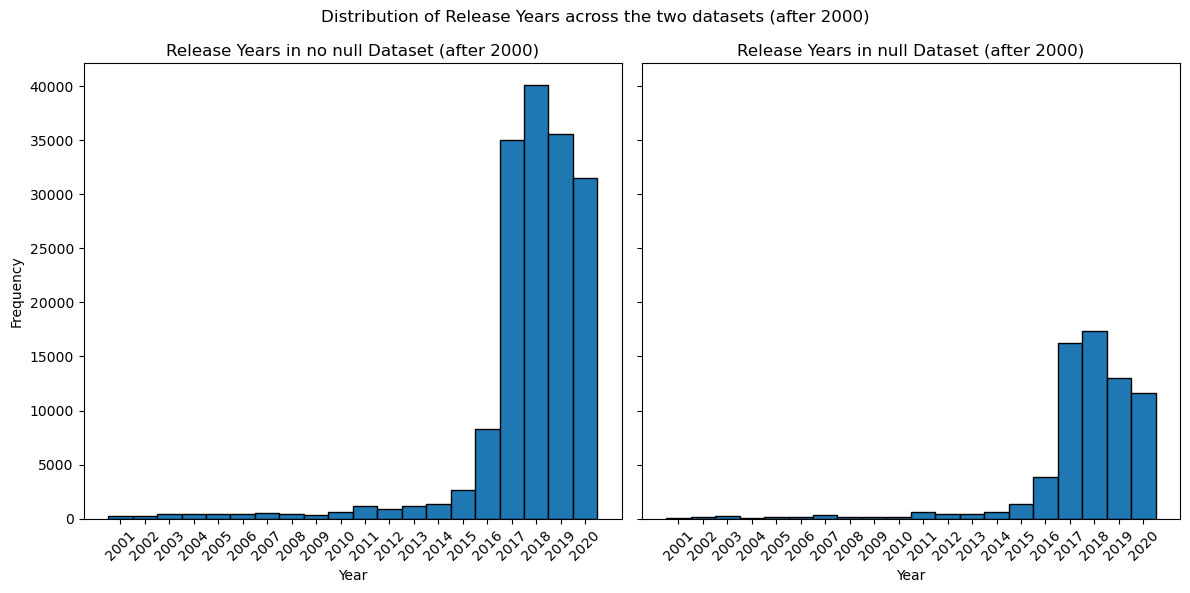

In [63]:
# Examine the distribution of release dates across the two datasets (post-2000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Extract just the year from the release dates and filter for years > 2000
release_years_no_nulls = pd.to_datetime(data_filtered_no_nulls["Release_date"]).dt.year
release_years_no_nulls = release_years_no_nulls[release_years_no_nulls > 2000]

release_years_nulls = pd.to_datetime(data_filtered_nulls["Release_date"]).dt.year
release_years_nulls = release_years_nulls[release_years_nulls > 2000]

# Calculate the range of years to create integer bins
min_year = min(release_years_no_nulls.min(), release_years_nulls.min())
max_year = max(release_years_no_nulls.max(), release_years_nulls.max())
year_bins = np.arange(min_year, max_year + 2) - 0.5  # +2 to include the max year, -0.5 for bin edges

ax1.hist(release_years_no_nulls, bins=year_bins, edgecolor='black')
ax2.hist(release_years_nulls, bins=year_bins, edgecolor='black')

# Set integer ticks on x-axis
years_range = np.arange(min_year, max_year + 1)
ax1.set_xticks(years_range)
ax2.set_xticks(years_range)

# Rotate x-axis labels if needed for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

ax1.set_title("Release Years in no null Dataset (after 2000)")
ax2.set_title("Release Years in null Dataset (after 2000)")
fig.suptitle("Distribution of Release Years across the two datasets (after 2000)")

ax1.set_xlabel("Year")
ax2.set_xlabel("Year")
ax1.set_ylabel("Frequency")

plt.tight_layout()
plt.show()